# Natural Language Processing (NLP)
## Text Categorization

+ https://realpython.com/python-nltk-sentiment-analysis/
+ https://www.nltk.org/howto/classify.html
+ https://www.nltk.org/book/ch06.html
+ https://www.tensorflow.org/text/tutorials/classify_text_with_bert
+ [NLTK Summary](https://towardsdatascience.com/text-summarization-using-tf-idf-e64a0644ace3)
+ [How to summarize text with OpenAI and LangChain](https://medium.com/@johnidouglasmarangon/how-to-summarize-text-with-openai-and-langchain-e038fc922af)
+ [Text Summary with OpenAI GPT-3 API](https://medium.com/muthoni-wanyoike/implementing-text-summarization-using-openais-gpt-3-api-dcd6be4f6933)
+ [Improved Implementation with OpenAI](https://medium.com/@tanguyvans/how-to-summarize-long-texts-using-openai-improving-coherence-and-structure-d896c5510c45)
+ [Text Summary with Multiple Tools](https://medium.com/analytics-vidhya/text-summarization-using-bert-gpt2-xlnet-5ee80608e961)
+ [Text Summary with Llama2](https://medium.com/@tushitdavergtu/llama2-and-text-summarization-e3eafb51fe28)

In [1]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#- Google Colab Check
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
RunningInCOLAB = False
RunningInCOLAB = 'google.colab' in str(get_ipython())

if RunningInCOLAB:
    print("You are running this notebook in Google Colab.")
else:
    print("You are running this notebook with Jupyter iPython runtime.")

You are running this notebook in Google Colab.


In [2]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#- Natural Language Toolkit (https://www.nltk.org/)
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
if RunningInCOLAB:
    !pip install nltk --quiet

import nltk

In [3]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#- Required to load necessary files to support NLTK
#- NLTK required resources
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("popular")
nltk.download("maxent_ne_chunker")
nltk.download("words")
nltk.download('averaged_perceptron_tagger')

#nltk.download("all")  #<- Only do this if you want the full spectrum of all possible packages, it's a LOT!

# Noun Part of Speech Tags used by NLTK
# More can be found here
# http://www.winwaed.com/blog/2011/11/08/part-of-speech-tags/
NOUNS = ['NN', 'NNS', 'NNP', 'NNPS']
VERBS = ['VB', 'VBG', 'VBD', 'VBN', 'VBP', 'VBZ']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzippin

In [4]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#- Natural Language Processing (NLP) specific libs
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer  # A word stemmer based on the Porter stemming algorithm.  Porter, M. "An algorithm for suffix stripping." Program 14.3 (1980): 130-137.
from nltk import pos_tag
from nltk.tree import tree
from nltk import FreqDist
from nltk import sent_tokenize, word_tokenize, PorterStemmer
from nltk.corpus import stopwords

#from nltk.book import * #<- Large Download, only pull if you want raw material to work with

In [5]:
if RunningInCOLAB:
    !pip install bs4 --quiet
    !pip install wordcloud --quiet
    !pip install pathlib --quiet
    !pip install numpy --quiet
    !pip install Pillow --quiet

In [6]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# More NLP specific libraries
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
from bs4 import BeautifulSoup                 #used to parse the text
from wordcloud import WordCloud, STOPWORDS    #custom library specifically designed to make word clouds
stemmer = PorterStemmer()

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# a set of libraries that perhaps should always be in Python source
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
import os
import socket
import sys
import getopt
import inspect
import warnings
import json
import pickle
from pathlib import Path
import itertools
import datetime
import re
import shutil
import string
import io

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Additional libraries for this work
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
import math
from base64 import b64decode
from IPython.display import Image
import requests

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Data Science Libraries
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
import numpy as np

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Graphics
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
import matplotlib.pyplot as plt
from PIL import Image
import PIL.ImageOps

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# progress bar
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
if RunningInCOLAB:
    !pip install alive-progress --quiet

from alive_progress import alive_bar
from alive_progress.styles import showtime, Show
from tqdm import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


# Input Sources

In [7]:
###########################################
#- SETUP ACCESS TO THE PUBLIC BUCKET
###########################################
#https://colab.research.google.com/notebooks/io.ipynb?authuser=2#scrollTo=r-exJtdG3XwJ
#https://colab.research.google.com/notebooks/snippets/drive.ipynb

from google.colab import drive
from google.colab import auth
from google.colab import files
# libraries for the files in google drive
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from googleapiclient.http import MediaIoBaseDownload

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [8]:
###########################################
#- Text Resources
###########################################
file_id = '1ULN-xN8dASvEN-zfZc61yijK0Ry1qHgo' #<-- Star Wars "A New Hope"
data=""
try:
     download = drive.CreateFile({'id': file_id})
     data=download.GetContentString()
except Exception as e:
    print(f"ERROR detected trying to detect the input file as follows: {str(e)}")

#Save them locally
#from google.colab import files
#with open('example.txt', 'w') as f:
#  f.write('some content')
#files.download('example.txt')

In [10]:
###########################################
#- API Parameters for things like WordCloud
###########################################
IMG_BACKGROUND=None                             #None without quotes or "black", "white", etc...
IMG_FONT_SIZE_MIN=14
IMG_WIDTH=800
IMG_HEIGHT=600

In [11]:
###########################################
#- Demonstrate use of tokens and stopwords
###########################################

#stop words
response=sent_tokenize(data)

print(f"There are {len(response)} sentences.")
#for the_index, the_sentence in enumerate(response):
#    print(f"{the_index}. {the_sentence.strip()}")
#
#print("\n")

response=word_tokenize(data)
print(f"There are {len(response)} words.")
#for the_index, the_word in enumerate(response):
#    print(f"{the_index}. \"{the_word.strip()}\"  ", end="")
#
#print("\n")

stop_words = set(stopwords.words("english"))
filtered_list = []

response=word_tokenize(data.lower())
wordlist = [x for x in response if (len(x)>=2 and x.isalpha())]

for word in tqdm(wordlist):
    if word.casefold() not in stop_words:
         filtered_list.append(word)

print("\n")
print(f"There are {len(filtered_list)} remaining words after cleaning them up.")
#for the_index, the_word in enumerate(filtered_list):
#    print(f"{the_index}. \"{the_word.strip()}\"  ",end="")

There are 3595 sentences.
There are 39401 words.


100%|██████████| 31188/31188 [00:00<00:00, 1529749.66it/s]



There are 19104 remaining words after cleaning them up.


# Cloud Map

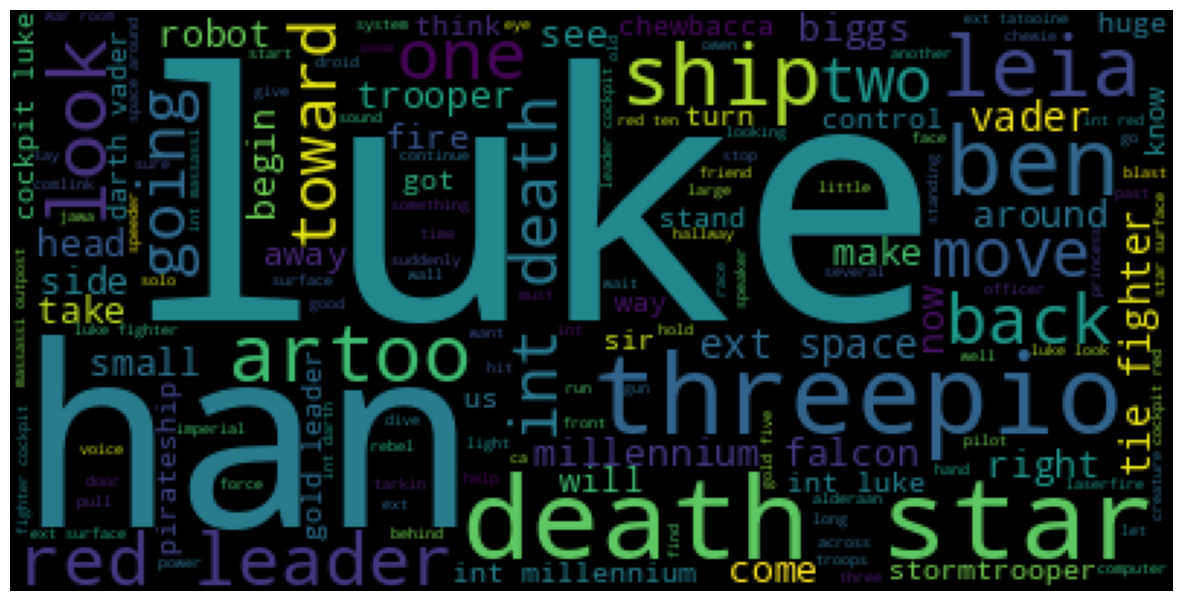

In [12]:
########################################
#Used from previous read of text
########################################
the_data = data

########################################
#Read in the data and perform initial setup
########################################
try:
    text=BeautifulSoup(data).get_text()
    cleaned = nltk.word_tokenize(text.lower())
except Exception as e:
    print(f"ERROR detected trying call BeautifulSoup on the data as follows: {str(e)}")
########################################
#Very basic clean-up continued
########################################
wordlist = [x for x in cleaned if (len(x)>=2 and x.isalpha())]

########################################
#API Call (resultant is an image)
########################################
try:
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color=IMG_BACKGROUND
                         ).generate(" ".join(wordlist))

except Exception as e:
    print(f"ERROR detected trying invoke the WordCloud call as follows: {str(e)}")
########################################
#Show the Results
########################################
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Cloud Map with Stop Words Applied to Original Body of Text

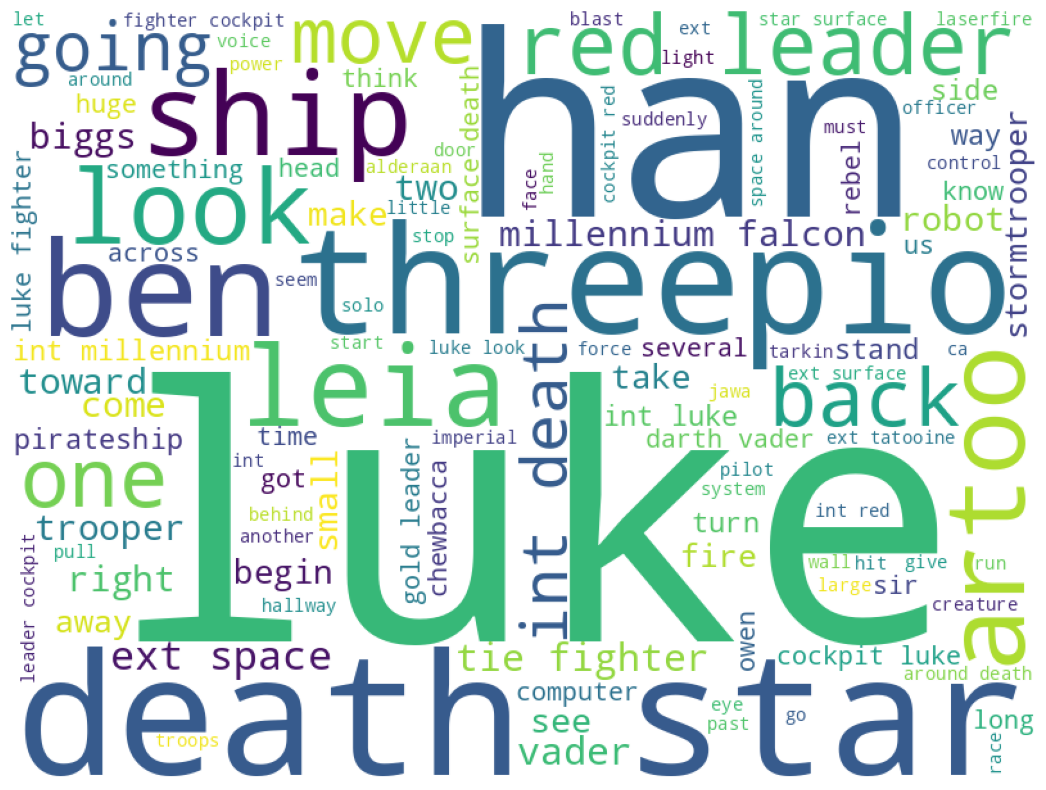

In [13]:
########################################
#Data Marshaling
########################################
data = " ".join(filtered_list)

########################################
#Initial Text Capture
########################################
text=BeautifulSoup(data).get_text()
cleaned = nltk.word_tokenize(text.lower())

########################################
#Basic Clean-Up
########################################
try:
    wordlist = [x for x in cleaned if (len(x)>=2 and x.isalpha())]
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',                #options line "None" yield transparent background.
                          min_font_size=IMG_FONT_SIZE_MIN,
                          width=IMG_WIDTH,
                          height=IMG_HEIGHT,

                         ).generate(" ".join(wordlist))

except Exception as e:
    print(f"ERROR detected trying invoke the WordCloud() call as follows: {str(e)}")
########################################
#Show the Results
########################################
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Mounted at /content/gdrive


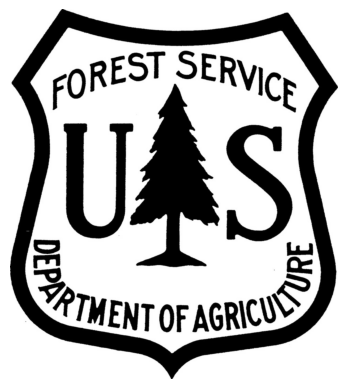

In [14]:
###########################################
#- Images, Mask loading and setup
###########################################
file_id = '15lYvt5Jf3KxokmajbV3LZmUPZAnld44v' #<-- Forest Service Image Mask for Word Cloud

from google.colab import drive
drive.mount("/content/gdrive")
the_logo = Image.open('/content/gdrive/MyDrive/data/usfs_mask.jpg')

plt.figure()
plt.axis('off')
plt.imshow(the_logo)
plt.show()

# With a Mask

Note that the "mask" is effectively an image of same size that's black and white.  Blacked out portions become the area you can populate so I took the USFS logo, inverted so the white becomes black and filled in the verbiage there.

Next I paste the transparent PNG on top of the original logo thus putting the words in the middle.

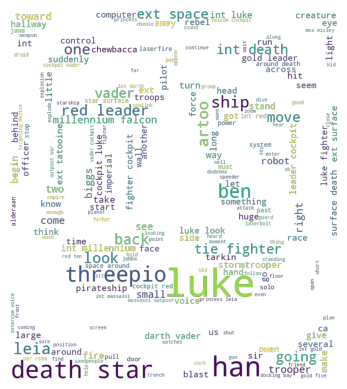

In [15]:
########################################
#Mask loading and setup
########################################
try:
    inverted_image = PIL.ImageOps.invert(the_logo)
    the_mask = np.array(inverted_image)  # Convert the image to a numeric representation (a 3D array)
except Exception as e:
    print(f"ERROR detected trying read the mask image and invert the colors call as follows: {str(e)}")


########################################
#Data Marshaling, NLP setup
########################################
data = " ".join(filtered_list)
text=BeautifulSoup(data).get_text()
cleaned = nltk.word_tokenize(text.lower())
wordlist = [x for x in cleaned if (len(x)>=2 and x.isalpha())]

########################################
#API Call
########################################
try:
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      mode="RGBA",
                      background_color=IMG_BACKGROUND, #white, black, blue, etc
                      min_font_size=IMG_FONT_SIZE_MIN,
                      width=IMG_WIDTH,
                      height=IMG_HEIGHT,
                      mask=the_mask,
                     ).generate(" ".join(wordlist))
    the_image= wordcloud.to_image()

except Exception as e:
    print(f"ERROR detected trying invoke the WordCloud() call as follows: {str(e)}")

plt.figure()
plt.axis('off')
plt.imshow(the_image)
plt.show()

# Merge the Images into a single instance

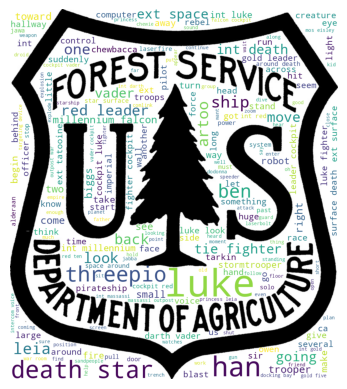

In [16]:
# creating a image object (main image)
#im1 = Image.open("/projects/data/llm/masks/usfs_mask.jpg")
im1=the_logo
#im2= Image.open("/projects/data/llm/results/usfs_wordcloud.png")
#alpha = im2.getchannel('A')
im2=the_image
alpha = im2.getchannel('A')

#transparency save
im1.paste(im2, (0,0), im2)

the_final_image=im1
plt.figure()
plt.axis('off')
plt.imshow(the_final_image)
plt.show()